# ML HidroPrev com a API Keras

In [1]:
# Bibliotecas
import eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import keras
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

2025-07-30 13:30:29.846945: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753896629.858154 2741685 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753896629.861554 2741685 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753896629.871443 2741685 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753896629.871456 2741685 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753896629.871458 2741685 computation_placer.cc:177] computation placer alr

In [2]:
dados_manaus = eda.data_processing('Cotas extraidas', '1903-01-01', '2019-12-31', ['dados_diarios_estacao_14990000.csv'])
dados_manaus

,14990000
Data,
1903-01-01,1914.0
1903-01-02,1921.0
1903-01-03,1924.0
1903-01-04,1926.0
1903-01-05,1929.0
...,...
2019-12-27,2238.0
2019-12-28,2247.0
2019-12-29,2256.0


### Machine Learning

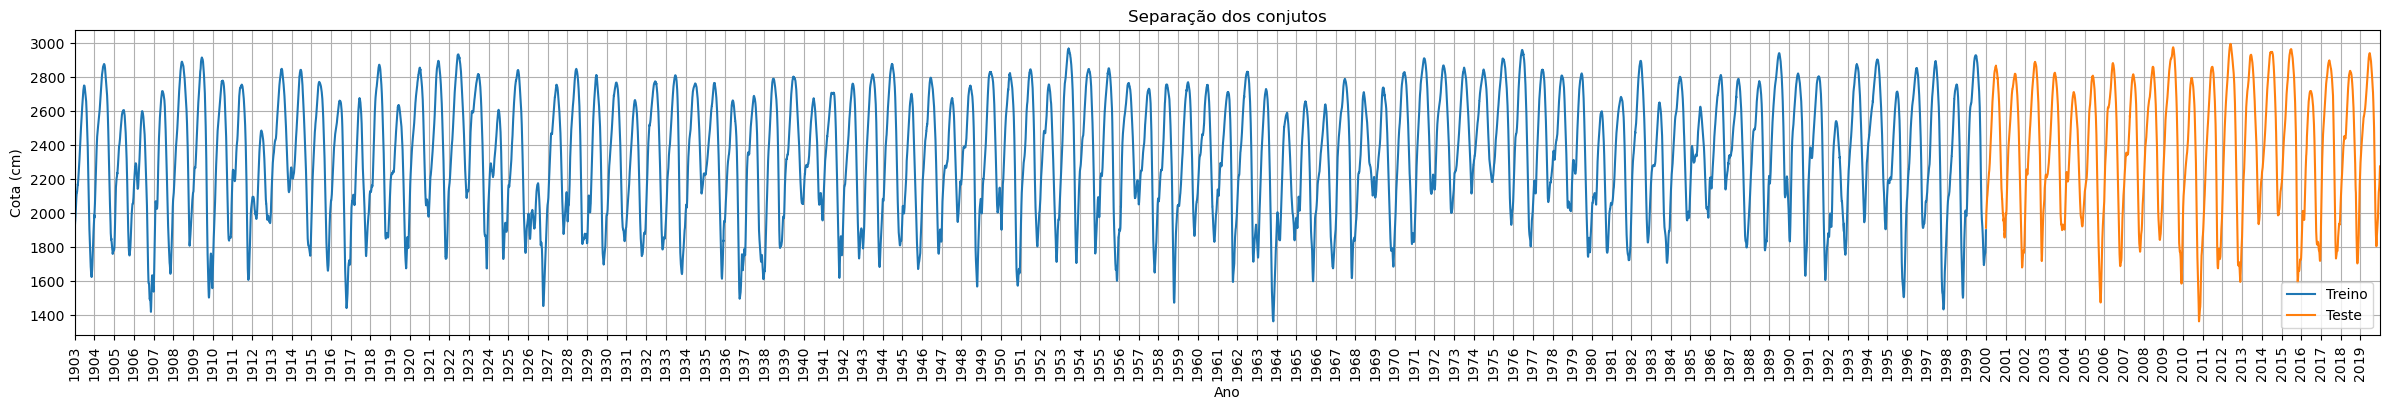

In [29]:
# Separação do conjunto
treino = dados_manaus[:'1999-12-31']
teste = dados_manaus['2000-01-01':]

plt.figure(figsize=(24, 4))
plt.plot(treino['14990000'])
plt.plot(teste['14990000'])
plt.legend(['Treino', 'Teste'])
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlabel('Ano')
plt.ylabel('Cota (cm)')
plt.xticks(rotation=90)
plt.xlim(dados_manaus.index[0], dados_manaus.index[-1])
plt.tight_layout()
plt.title('Separação dos conjutos')
plt.show()

##### LSTM

In [4]:
def create_multi_step_dataset(series, janela, n_steps):
    X, y = [], []
    for i in range(len(series) - janela - n_steps + 1):
        X.append(series[i:i+janela])
        y.append(series[i+janela:i+janela+n_steps])
    return np.array(X), np.array(y)

In [5]:
janela = 15
steps = 15

X, y = create_multi_step_dataset(dados_manaus['14990000'].values, janela, steps)

x_train = X[:treino.shape[0]-janela]
y_train = y[:treino.shape[0]-janela]

x_test = X[treino.shape[0]-janela:]
y_test = y[treino.shape[0]-janela:]

x_scale = MinMaxScaler()
x_train = x_scale.fit_transform(x_train)
x_test = x_scale.transform(x_test)

y_scale = MinMaxScaler()
y_train = y_scale.fit_transform(y_train)
y_test = y_scale.transform(y_test)

In [6]:
lstm = keras.models.Sequential([
    keras.layers.Input(shape=(janela, 1)),
    keras.layers.LSTM(150),
    keras.layers.Dense(steps)
])

lstm.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.MeanAbsoluteError()])

lstm.fit(x_train, y_train, epochs=50)

I0000 00:00:1753896631.919097 2741685 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10151 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/50


I0000 00:00:1753896633.466198 2741994 cuda_dnn.cc:529] Loaded cuDNN version 90300


1107/1107 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0186 - mean_absolute_error: 0.0746
Epoch 2/50
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 7.7202e-04 - mean_absolute_error: 0.0205
Epoch 3/50
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 4.8960e-04 - mean_absolute_error: 0.0156
Epoch 4/50
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 4.1183e-04 - mean_absolute_error: 0.0141
Epoch 5/50
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.6505e-04 - mean_absolute_error: 0.0129
Epoch 6/50
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.3129e-04 - mean_absolute_error: 0.0123
Epoch 7/50
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.1307e-04 - mean_absolute_error: 0.0119
Epoch 8/50
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.9873e-04 - mean_absolute_error: 0.0116
Epoch 9/50
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.9693e-04 - mean_absolute_error: 0.0116
Epoch 10/50
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.6878e-04 - mean_absolut

In [7]:
pred = lstm.predict(x_test)

228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [8]:
pred_inv = y_scale.inverse_transform(pred)
y_test_inv = y_scale.inverse_transform(y_test)

In [25]:
r2_score(y_test_inv, pred_inv)

0.9967395844780164

R²: 1.0000
MSE: 6.9013
RMSE: 2.6270
MAE: 1.5801


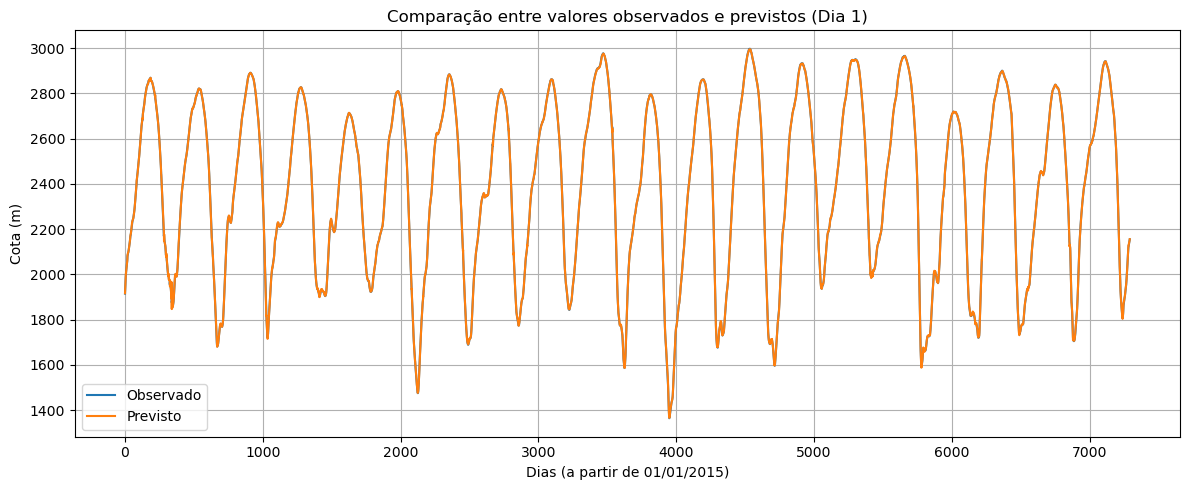

R²: 0.9985
MSE: 228.9380
RMSE: 15.1307
MAE: 10.0277


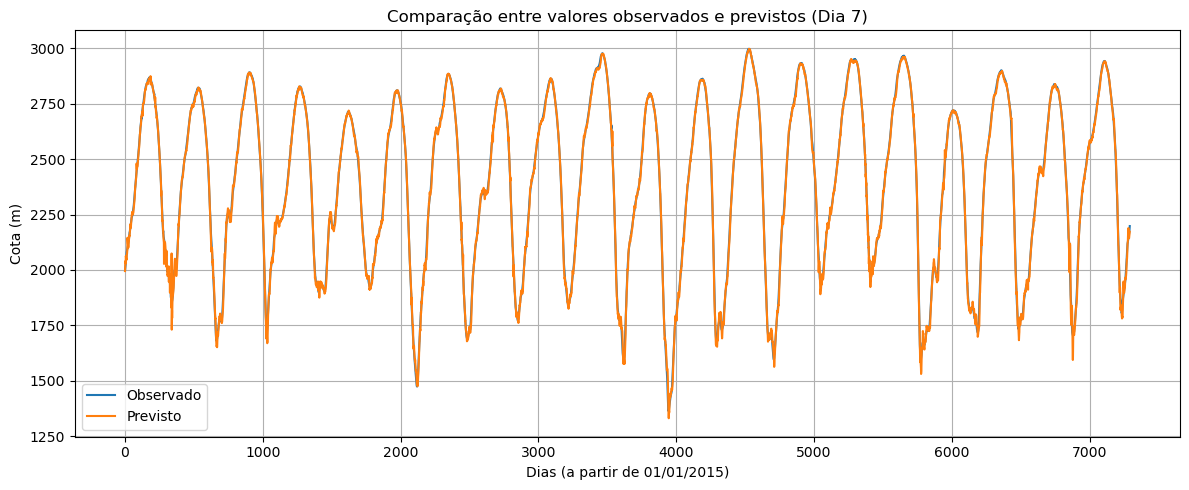

R²: 0.9899
MSE: 1521.8671
RMSE: 39.0111
MAE: 27.1065


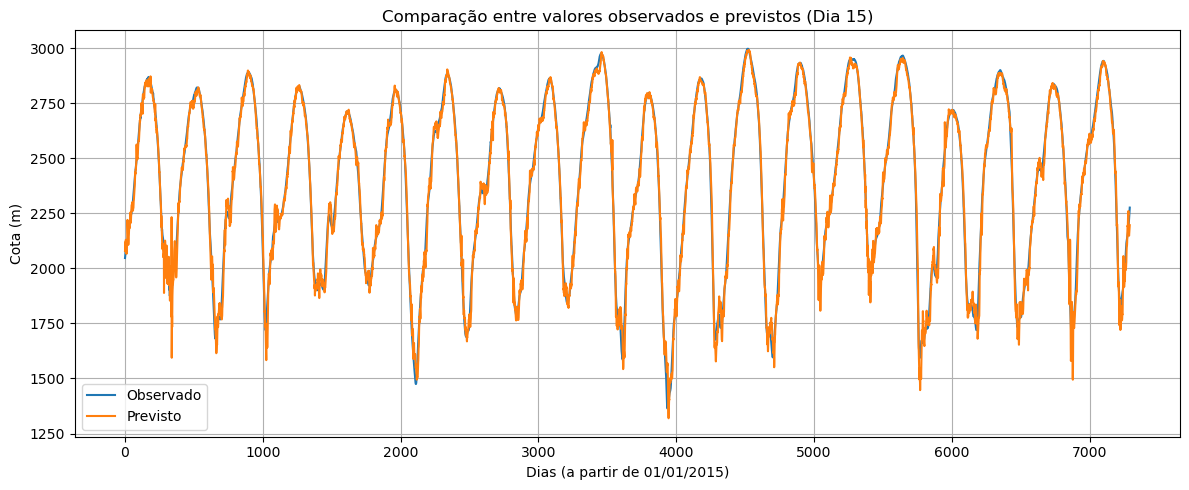

In [9]:
horizonte = [1, 7, 15]

for i in horizonte:
    print(f"R²: {r2_score(y_test_inv[:,i-1], pred_inv[:,i-1]):.4f}")
    print(f"MSE: {mean_squared_error(y_test_inv[:, i-1], pred_inv[:,i-1]):.4f}")
    print(f"RMSE: {root_mean_squared_error(y_test_inv[:, i-1], pred_inv[:,i-1]):.4f}")
    print(f"MAE: {mean_absolute_error(y_test_inv[:, i-1], pred_inv[:,i-1]):.4f}")

    plt.figure(figsize=(12, 5))
    plt.plot(y_test_inv[:,i-1], label='Observado')
    plt.plot(pred_inv[:,i-1], label='Previsto')
    plt.xlabel('Dias (a partir de 01/01/2015)')
    plt.ylabel('Cota (m)')
    plt.title(f'Comparação entre valores observados e previstos (Dia {i})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Testando com dados de 2020 até 2024

In [18]:
dados_manaus2 = eda.data_processing('Cotas extraidas', '2020-01-01', '2024-12-31', ['dados_diarios_estacao_14990000.csv'])
dados_manaus2

,14990000
Data,
2020-01-01,2287.0
2020-01-02,2299.0
2020-01-03,2306.0
2020-01-04,2312.0
2020-01-05,2318.0
...,...
2024-12-27,1751.0
2024-12-28,1769.0
2024-12-29,1785.0


In [19]:
x_test2, y_test2 =  create_multi_step_dataset(dados_manaus2['14990000'].values, janela, steps)

x_test2 = x_scale.transform(x_test2)

In [20]:
pred2 = lstm.predict(x_test2)

 1/57 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [21]:
pred2_inv = y_scale.inverse_transform(pred2)

R²: 1.0000
MSE: 6.9013
RMSE: 2.6270
MAE: 1.5801


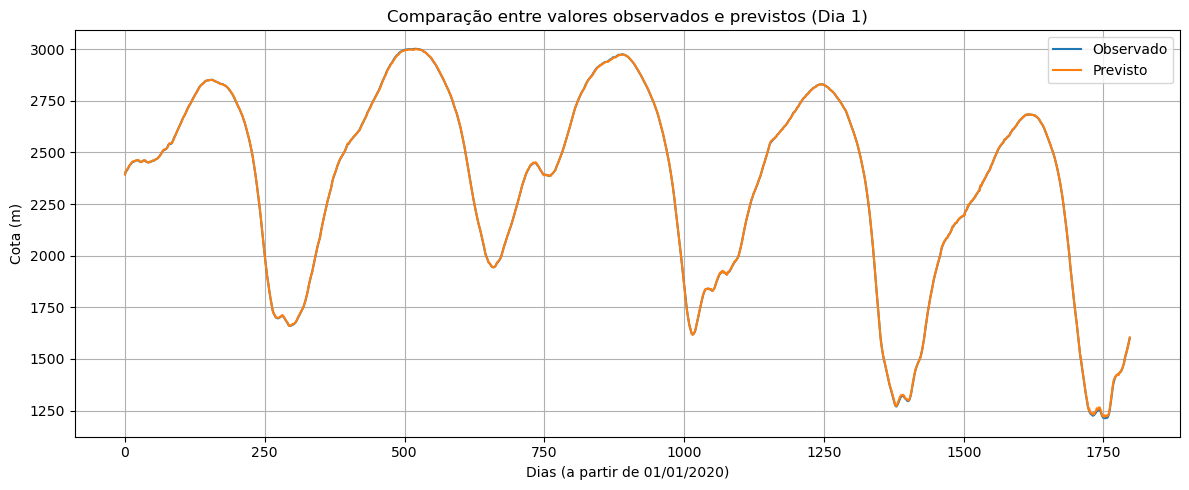

R²: 0.9989
MSE: 228.9380
RMSE: 15.1307
MAE: 10.0277


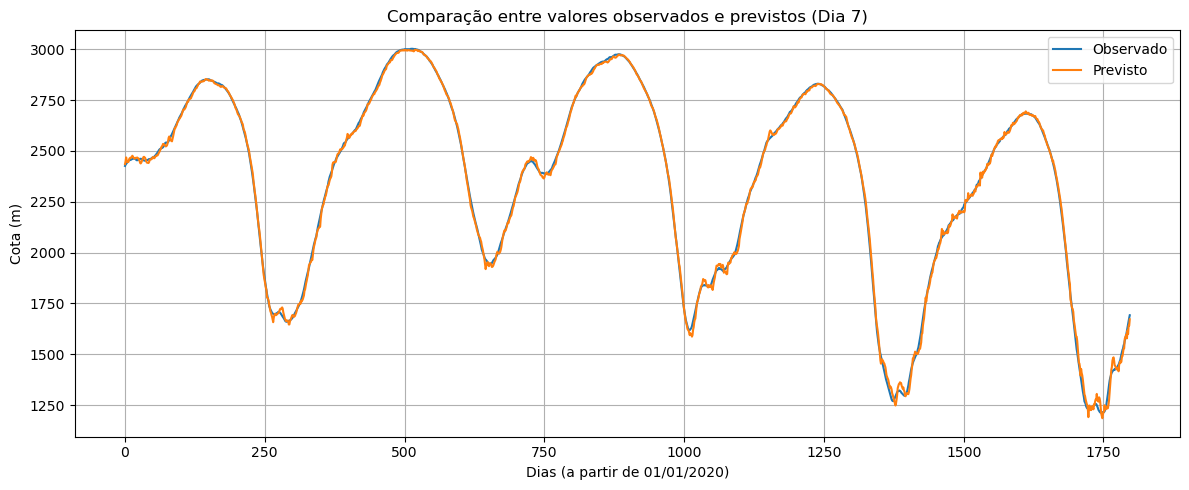

R²: 0.9916
MSE: 1521.8671
RMSE: 39.0111
MAE: 27.1065


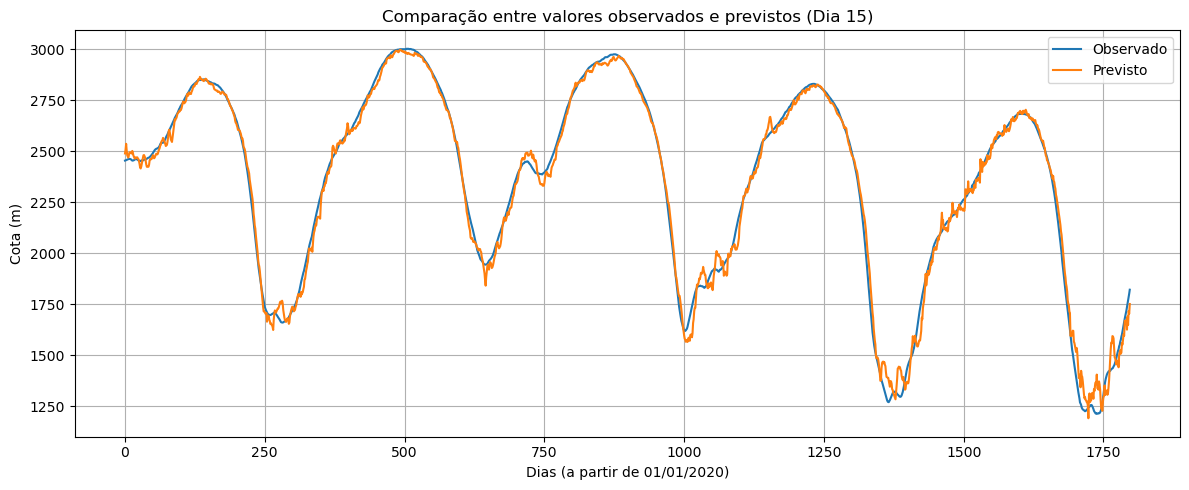

In [23]:
for i in horizonte:
    print(f"R²: {r2_score(y_test2[:,i-1], pred2_inv[:,i-1]):.4f}")
    print(f"MSE: {mean_squared_error(y_test_inv[:, i-1], pred_inv[:,i-1]):.4f}")
    print(f"RMSE: {root_mean_squared_error(y_test_inv[:, i-1], pred_inv[:,i-1]):.4f}")
    print(f"MAE: {mean_absolute_error(y_test_inv[:, i-1], pred_inv[:,i-1]):.4f}")
    
    plt.figure(figsize=(12, 5))
    plt.plot(y_test2[:,i-1], label='Observado')
    plt.plot(pred2_inv[:,i-1], label='Previsto')
    plt.xlabel('Dias (a partir de 01/01/2020)')
    plt.ylabel('Cota (m)')
    plt.title(f'Comparação entre valores observados e previstos (Dia {i})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [26]:
lstm.save('Modelos/lstm_30072025_w15_s15.keras')